# Tracé d'un graphique à partir de données expérimentales. Obtention des droites de pentes min et max. 


## Introduction

Ceci est une proposition de méthode, ne pas hésiter à commenter/améliorer !

On utilise un exemple de tracé de caractéristique de dipôle en électricité. Il est nécessaire d'avoir le fichier avec les données expérimentales (UI.txt) dans le même dossier que le Notebook. 

Dans un premier temps, on importe les bibliothèques python nécessaires au traitement des données, à l'affichage des graphiques et à l'analyse statistique. 

In [1]:
# import de la bibliothèque numpy (gestion de matrices et routines mathématiques) en lui donnant le surnom np
import numpy as np
import matplotlib
# import de la bibliothèque matplotlib (graphiques) en lui donnant le surnom plt
import matplotlib.pyplot as plt
# import de la bibliothèque statstics (graphiques) en lui donnant le surnom st
import statistics as st
import pandas as pd

Ensuite, on veut entrer les données expérimentales, avec leurs erreurs, et éventuellement faire des calculs indirects (I en fonction de U et R par exemple).
Plusieurs solution : 
- import à partir d'un fichier tete (*.txt) correctement formatté, à placer dans le même répertoire que le notebook, ou en mettant le chemin approprié
- import à partir de données Excel formattées : read_excel(io[, sheet_name, header, names, ...])
- entrée des données directement dans un dictionnaire { "intitulé" : tableau Numpy, ...}

Les données sont ensuite rangées dans un objet DataFrame de la librairie Pandas, pour un affichage et une gestion des données optimales.

In [2]:
U, I, DU, DI = np.loadtxt('UI.txt', unpack = True, usecols = (0, 1, 2, 3), delimiter = '\t', skiprows = 1)


In [3]:
# entrée des données numériques dans des tableaux Numpy

Rs = 1.01 #résistance de shunt, en ohm

U = np.array([2.38, 2.33, 2.26, 2.21, 2.17, 2.13, 2.09, 2.01, 1.87, 1.62, 1.52, 1.44, 1.37, 1.28,
 1.23, 1.18]) # tension aux bornes du dipole étudié, en mV

Us = np.array([0., 0.05, 0.16, 0.25, 0.32, 0.37, 0.46, 0.56, 0.79, 1.2,  1.42, 1.49, 1.6,  1.73,
 1.82, 1.89]) # tension aux bornes de la résistance de shunt (pour le courant), en mV
# Rv = [1000, 680, 480, 347, 270, ..] # résistance de shunt, en ohm 

I = Us / Rs # intensité, en mA

DI = [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.02, 0.02, 0.02,
 0.02, 0.02]

DU = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.04, 0.04, 0.04, 0.04, 0.04,
 0.04, 0.04]

In [4]:
# création de l'objet DataFrame de la librairie Pandas

dict = {"U_dip (mV)" : U,
       "I_dip (mA)" : I,
        "erreur " + chr(948) + "I (mA)" : DI,
        "erreur " + chr(948) + "U (mV)" : DU}


# création d'un objet DataFrame de la librairie Pandas.
data = pd.DataFrame(dict)
data # visualisation du tableau de valeurs

,U_dip (mV),I_dip (mA),erreur δI (mA),erreur δU (mV)
0,2.38,0.000000,0.01,0.05
1,2.33,0.049505,0.01,0.05
2,2.26,0.158416,0.01,0.05
3,2.21,0.247525,0.01,0.05
4,2.17,0.316832,0.01,0.05
5,2.13,0.366337,0.01,0.05
6,2.09,0.455446,0.01,0.05
7,2.01,0.554455,0.01,0.05
8,1.87,0.782178,0.01,0.05
9,1.62,1.188119,0.02,0.04


## Affichage des données expérimentales


<AxesSubplot:title={'center':"Tension en fonction de l'intensité"}, xlabel='I_dip (mA)', ylabel='U_dip (mV)'>

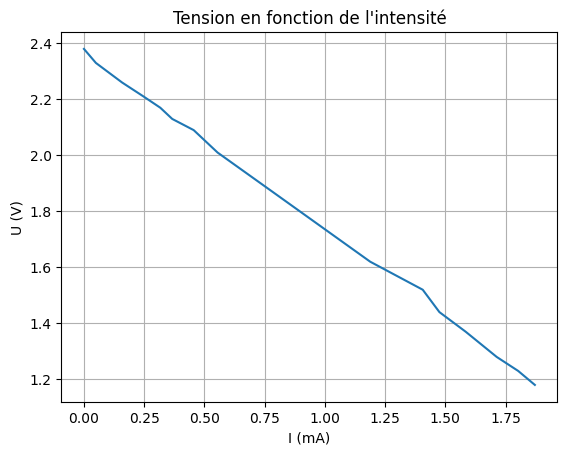

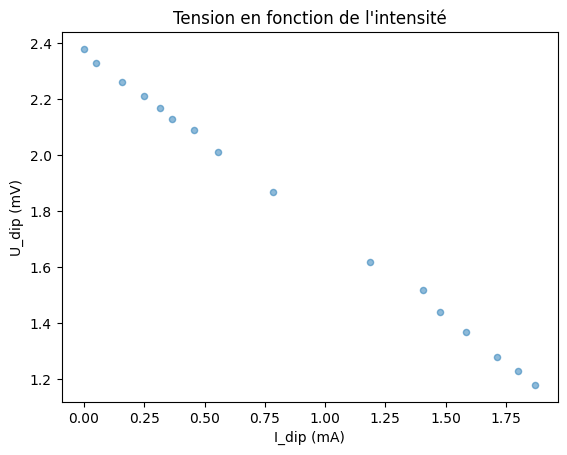

In [5]:
#Tracé de la caractéristique avec titre, axes et unités
#matplotlib.style.use("seaborn")

fig, ax = plt.subplots()
ax.plot(data["I_dip (mA)"], data["U_dip (mV)"])

# Ecriture scientifique pour l'affichage de l'intensité
ax.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))
ax.set_xlabel("I (mA)")
ax.set_ylabel("U (V)")
ax.grid(True)
ax.set_title("Tension en fonction de l'intensité")

# ou la fonction plot intégrée au DataFrame où on accède directement aux données par leur intitulé :

data.plot.scatter(x="I_dip (mA)", y="U_dip (mV)", alpha=0.5, title="Tension en fonction de l'intensité")

## Calcul de la régression linéaire
On cherche maintenant l'équation de la droite de regression linéaire de ces données:

In [6]:
# Regression linéaire pour la modélisation
coefficients = np.polyfit(data["I_dip (mA)"], data["U_dip (mV)"], 1)
print (coefficients)

[-0.62905923  2.36738402]


In [7]:
# On réduit le nombre de chiffres significatifs et on rajoute les unités. 
pente=coefficients[0]
ordonnee_origine = coefficients[1]
pente_a = round(pente*1000,)
ordonnee_origine_a = round (ordonnee_origine,2)
print ("L'équation de la droite de régression est : U=",ordonnee_origine_a,"V", pente_a,"Ohm*I")


L'équation de la droite de régression est : U= 2.37 V -629 Ohm*I


## Affichage du modèle
On veut maintenant rajouter le modèle linéaire sur la figure des points expérimentaux. 

Si on veut rajouter l'équation du modèle, on peut rajouter la commande suivante avant d'afficher le graphique:
plt.text(0.0001,1.2,"U=" + str(ordonnee_origine_a)+ str(pente_a)+ "I")


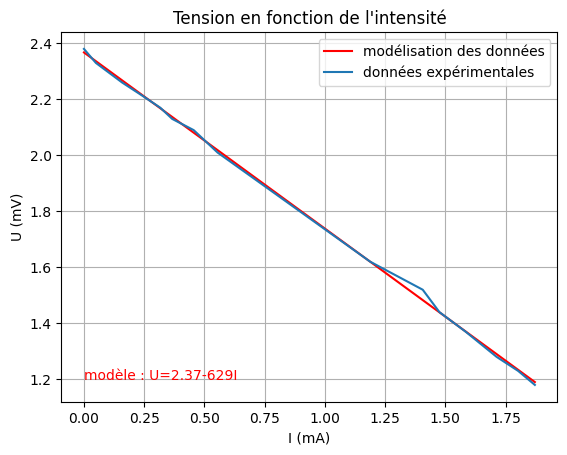

<Figure size 640x480 with 0 Axes>

In [9]:
U_mod=ordonnee_origine + pente * data["I_dip (mA)"]

plt.plot(data["I_dip (mA)"], U_mod,'-r', label="modélisation des données")
plt.plot(data["I_dip (mA)"], data["U_dip (mV)"], label="données expérimentales")

plt.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))
plt.xlabel("I (mA)")
plt.ylabel("U (mV)")
plt.legend() 
plt.grid(True)
plt.title("Tension en fonction de l'intensité")

plt.text(0.0001,1.2,"modèle : U=" + str(ordonnee_origine_a)+ str(pente_a)+ "I",color='r')  
plt.show() 
plt.savefig('caract_U_I.png')

## Barres d'erreurs
On cherche maintenant à rajouter les barres d'erreurs.

Text(0.5, 1.0, "Tension en fonction de l'intensité")

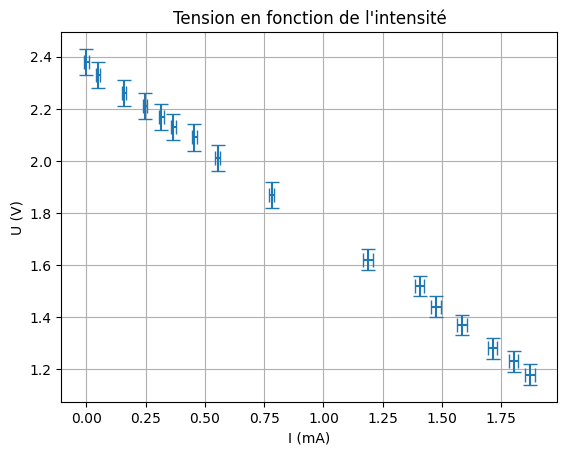

In [10]:
plt.errorbar(data["I_dip (mA)"], data["U_dip (mV)"], xerr = data["erreur " + chr(948) + "I (mA)"], yerr = data["erreur " + chr(948) + "U (mV)"], capsize=5, fmt = 'none')
plt.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))
plt.xlabel("I (mA)")
plt.ylabel("U (V)")
plt.grid(True)
plt.title("Tension en fonction de l'intensité")

In [11]:
# définition de la fonction de fit

def linear_func(p, x):
    m, c = p
    return m*x + c

In [13]:
from scipy.odr import *

# création du modèle
linear_model = Model(linear_func)

# Création d'un objet RealData du module scipy.odr
data = RealData(I, U, sx = DI, sy = DU)

# Préparation de la régression
odr = ODR(data, linear_model, beta0=[0., 1.])

# Lancement de la regression linéaire orthogonale.
out = odr.run()

# affichage des résultats
out.pprint()

Beta: [-0.62931171  2.36793275]
Beta Std Error: [0.00485708 0.00578333]
Beta Covariance: [[ 0.00030038 -0.00029665]
 [-0.00029665  0.00042587]]
Residual Variance: 0.07853878409732941
Inverse Condition #: 0.06396711947822319
Reason(s) for Halting:
  Sum of squares convergence


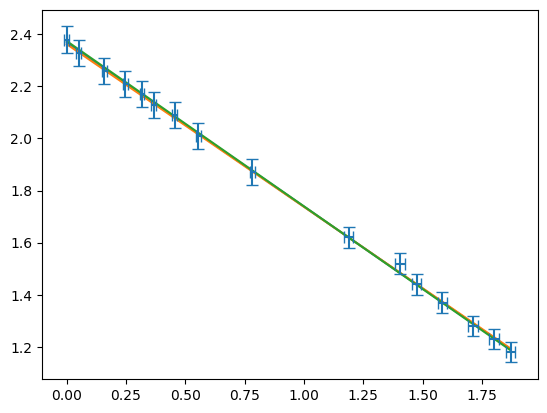

In [14]:
# affichage des droites de régression de pentes min et max
# affichage des points avec leurs barres d'erreur en x et y
x = I
y = U
y_reg = out.beta[1] + out.beta[0] * np.asarray(I)
y_low = out.beta[1] - out.sd_beta[1] + (out.beta[0] + out.sd_beta[0])* np.asarray(x)
y_high = out.beta[1] + out.sd_beta[1] + (out.beta[0] - out.sd_beta[0])* np.asarray(x)


plt.plot(x, y_reg)
plt.plot(x, y_low)
plt.plot(x, y_high)
plt.errorbar(x, y, xerr=DI, yerr = DU, capsize=4,fmt = 'none')
plt.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))

## Génération de toutes les droites qui passent par les boîtes d'erreur. 


Text(0.5, 1.0, "Tension en fonction de l'intensité")

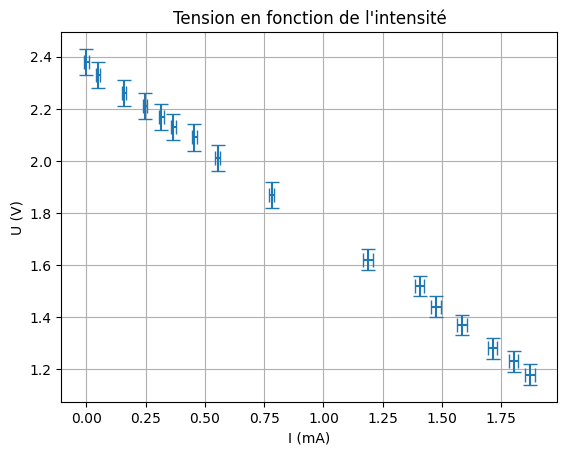

In [15]:
ax = plt.subplot(111)
ax.errorbar(I, U, xerr = DI, yerr = DU, capsize=5, fmt = 'none')
ax.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))
ax.set_xlabel("I (mA)")
ax.set_ylabel("U (V)")
ax.grid(True)
ax.set_title("Tension en fonction de l'intensité")

In [16]:
print(type(I))

<class 'numpy.ndarray'>


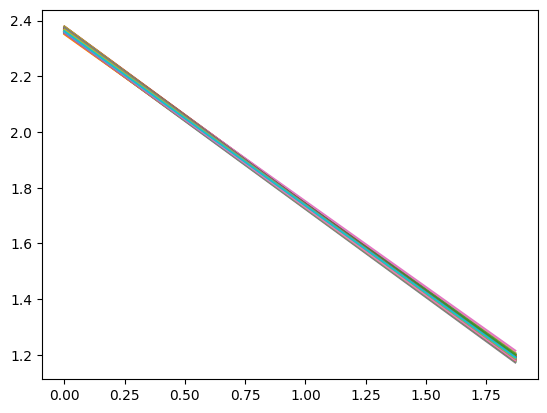

r_g= -629 +/- 0 ohm

E_g= 2.37 +/- 0.02 V


In [15]:
n=50 #nbre de tirages aléatoires
s=3 #nbre d'ecarts type dans une barre d'erreur
l = len(I)
import random

mat_pente=np.zeros([n,2])  # initialisation matrice fit (ax+b)
for i in range (0,n):
    Pf=np.asarray([random.gauss(0, 1) for j in range(l)])    # génération loi normale réduite centrée
    #Pf=[random.uniform(-1, 1) for j in range(l)]    # génération loi uniforme réduite centrée pour x
    #s=1 #dans le cas d'une distribution uniforme on prend s=1
    I_e = DI * Pf / s + I     # coordonnées nouveau point x
    U_e = DU * Pf / s + U    # coordonnées nouveau point y
    pp=np.polyfit(I_e,U_e,1) # régression linéaire sur point (x_e,y_e)
    mat_pente[i,]=pp  
    U_mod=pp[0]*I+pp[1]
    plt.plot(I, U_mod)
plt.show()

erreur_p=round(s*st.stdev(mat_pente[:,1]))  # ecartypes sur pentes (même nb que s)
erreur_o=round(s*st.stdev(mat_pente[:,0]),2)  # ecartypes sur pentes (même nb que s)
print("r_g=",pente_a,"+/-",erreur_p, "ohm")
print("E_g=",ordonnee_origine_a,"+/-",erreur_o, "V")

In [16]:
# Erreur sur la régression

def err_reg(n, s, l, x, y, dx, dy):
    mat_pente=np.zeros([n,2])  # initialisation matrice fit (ax+b)
    
    for i in range (0,n):
        Pf=np.asarray([random.gauss(0, 1) for j in range(l)])    # génération loi normale réduite centrée
        #Pf=[random.uniform(-1, 1) for j in range(l)]    # génération loi uniforme réduite centrée pour x
        #s=1 #dans le cas d'une distribution uniforme on prend s=1
        x_e = dx * Pf / s + x     # coordonnées nouveau point x
        y_e = dy * Pf / s + y    # coordonnées nouveau point y
        pp = np.polyfit(x_e, y_e, 1) # régression linéaire sur point (x_e,y_e)
        mat_pente[i,] = pp  
        y_mod=pp[0] * I + pp[1]
        #plt.plot(x, y_mod) # à commenter si on ne veut pas d'affichage
    plt.show()
    
    erreur_p=round(s * st.stdev(mat_pente[:,1]))  # ecartypes sur pentes (même nb que s)
    erreur_o=round(s * st.stdev(mat_pente[:,0]), 2)  # ecartypes sur pentes (même nb que s)
    
    return erreur_p, erreur_o

Appel de la fonction:

In [17]:
n=50 
s=3 #nbre d'ecarts type dans une barre d'erreur
l=len(I)
(erreur_p, erreur_o) = err_reg(n,s,l,I,U,DI,DU)
print ("L'équation de la droite de régression est : U=(",ordonnee_origine_a,"+/-",erreur_o ,")V+(",
       pente_a,"+/-",erreur_p,") Ohm*I")

L'équation de la droite de régression est : U=( 2.37 +/- 0.02 )V+( -629 +/- 0 ) Ohm*I
